In [1]:
# This notebook is based on the excellent Real Python article on K-Nearest Neighbors (KNN)
# It demonstrates how to implement the KNN algorithm from scratch and how to use it effectively with scikit-learn.
# Finally it demonstrates how to enhance the model performance through tuning with GridSearchCV and Bagging. 
# Link: https://realpython.com/knn-python

In [2]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Read and align the dataset
abalonedf = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data", header=None)

abalonedf.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]
abalonedf = abalonedf.drop("Sex", axis=1)
abalonedf.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<Axes: >

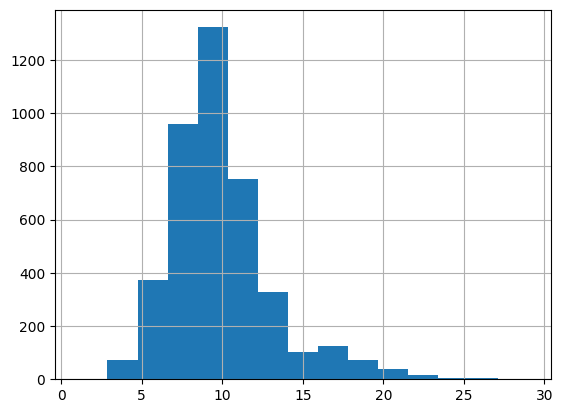

In [4]:
# Descriptive stats
abalonedf["Rings"].hist(bins=15)

In [11]:
# Correlation
correlation_matrix = abalonedf.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [6]:
# Split into x and y
from sklearn.model_selection import train_test_split

X = abalonedf.drop("Rings", axis=1).values
y = abalonedf["Rings"].values
X.shape, y.shape

((4177, 7), (4177,))

In [7]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [8]:
# Build model and train
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [9]:
# Evaluate
from sklearn.metrics import mean_squared_error

predicted = model.predict(X_test)
mse = mean_squared_error(y_test, predicted)
print('mse', mse)

mse 5.642610313662946


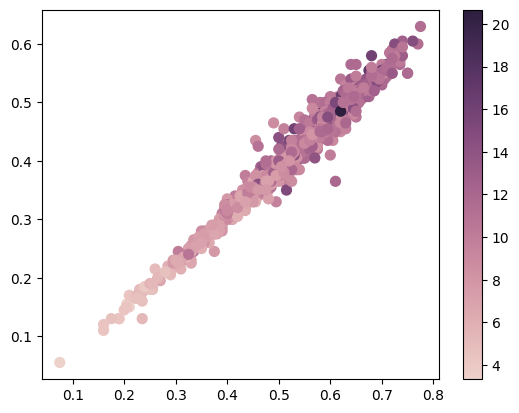

In [10]:
# Plot
import seaborn as sns

cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=predicted, s=50, cmap=cmap)
f.colorbar(points)
plt.show()